Her bir özelliğin üssünü alıp yeni bir özellik olarak ekliyoruz. Sonra yeni oluşan genişletilmiş veri seti(hem özelliğin orijinal değerini hem de karesini içeren veri seti) üzerinde doğrusal bir model geliştiriyoruz.Bu tekniğe Polinom Regresyonu(Polynomial Regression) denir.

Bir örneğe bakalım. İlk olarak, basit bir ikinci dereceden denklemi temel alan doğrusal olmayan veriler üretelim(artı biraz gürültü):

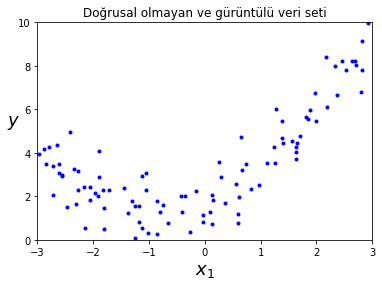

In [1]:
# gerekli kütüphanleri ekleyelim:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42) # program çalıştığında aynı sorunucu almak için

# ikinci dereceden denklemi temel alan doğrusal olmayan veriler oluşturma

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# çizim

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("Doğrusal olmayan ve gürüntülü veri seti")
plt.show()

Düz bir çizgi bu verilere asla tam olarak uymayacaktır(fit). Bu sebeple,eğitim verilerimizi dönüştürmek için <b>ScikitLearn'ün PolynomialFeatures</b> sınıfını kullanalım ve <b>eğitim setindeki her özelliğin karesini(ikinci dereceden polinom) yeni bir özellik olarak ekleyelim</b>(bu örneğimiz de yalnızca bir özellik vardır):

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False) # degree: polinom derecesi
X_poly=poly_features.fit_transform(X)

In [4]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [5]:
y[0]

array([1.61761105])

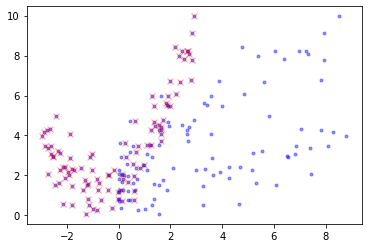

In [21]:
plt.plot(X_poly,y,"b.",alpha=0.4) # PolynomialFeatures ile dönüştürme yapılan veriler
plt.plot(X, y, "x",c="red",alpha=0.4) # orijinal veriler
plt.show()

X_poly artık X'in orijinal değerlerini ve bu değerlerin karesini içeriyor. Artık bu genişletilmiş eğitim verilerine bir LinearRegression modeli uydurabilirsiniz(fit):

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

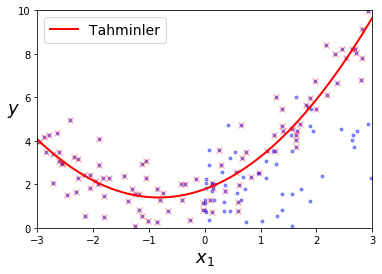

In [34]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

# oluşturulan polinom regresyon modeline tahmin yaptırmadan önce giriş verilerin polinoma dönüştürme işlemi yapılması gerekir
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X_poly,y,"b.",alpha=0.4)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Tahminler")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [40]:
# bir tahmin yapalım:

deger = np.array(3).reshape(-1,1)

lin_reg.predict(poly_features.fit_transform(deger))

# yukarıda da görüldüğü gibi polinom modeline tahmin yaptırmadan önce,giriş değerinin/değerlerinin 
# PolynomialFeatures ile dönüştürme işleminin yapılması gerekir.

array([[9.66341631]])